### Practical Project I (Linear Regression)

#### 00-Libraries

In [115]:
##########################################################
# Import Libraries to start work
##########################################################
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

#### 01-Data & Transformation

In [116]:
##########################################################
# Function to read file and select the amount of rows
##########################################################

def load_data_csv(file_name,rows_number=0):
    if rows_number > 0 :
        df = pd.read_csv(file_name, nrows=rows_number)
    else:
        df = pd.read_csv(file_name) 
    return df

In [117]:
df = load_data_csv(file_name="insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [118]:
##########################################################
# Function to change text columns to number
##########################################################

def change_columns(dataframe_input):
    #change column sex from char to int
    dataframe_input['sex'] =  dataframe_input['sex'].replace('male', 0)
    dataframe_input['sex'] =  dataframe_input['sex'].replace('female', 1)

    #change column smoker from char to int
    dataframe_input['smoker'] =  dataframe_input['smoker'].replace('no', 0)
    dataframe_input['smoker'] =  dataframe_input['smoker'].replace('yes', 1)

    #change column region from char to int
    #When latitude is north=0 and south=1 and longitude is east=0 and west=1
    for i in range(0,len(dataframe_input)):
        if dataframe_input.loc[i, 'region'] == "southwest":
                dataframe_input.loc[i, 'lat'] = 1
                dataframe_input.loc[i, 'long'] = 1
        elif dataframe_input.loc[i, 'region'] == "southeast":
                dataframe_input.loc[i, 'lat'] = 1
                dataframe_input.loc[i, 'long'] = 0
        elif dataframe_input.loc[i, 'region'] == "northwest":
                dataframe_input.loc[i, 'lat'] = 0
                dataframe_input.loc[i, 'long'] = 1
        else:
                dataframe_input.loc[i, 'lat'] = 0
                dataframe_input.loc[i, 'long'] = 0
    dataframe_input.drop(['region'], axis=1, inplace=True)

    return dataframe_input

In [119]:
df = change_columns(dataframe_input=df)
df.head(10)

,age,sex,bmi,children,smoker,charges,lat,long
0,19,1,27.900,0,1,16884.92400,1.0,1.0
1,18,0,33.770,1,0,1725.55230,1.0,0.0
2,28,0,33.000,3,0,4449.46200,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0
5,31,1,25.740,0,0,3756.62160,1.0,0.0
6,46,1,33.440,1,0,8240.58960,1.0,0.0
7,37,1,27.740,3,0,7281.50560,0.0,1.0
8,37,0,29.830,2,0,6406.41070,0.0,0.0
9,60,1,25.840,0,0,28923.13692,0.0,1.0


#### 02- Explore Data Analisis

<AxesSubplot:>

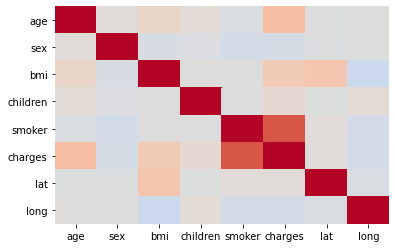

In [120]:
##########################################################
# Data heatmap with each feature
##########################################################
sns.heatmap(df.corr(), cmap="coolwarm", cbar=False, vmin=-1, vmax=1)

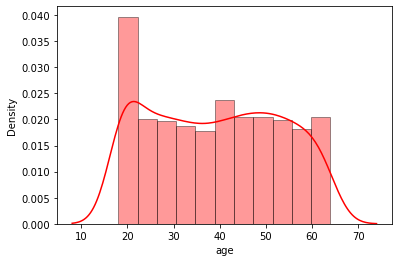

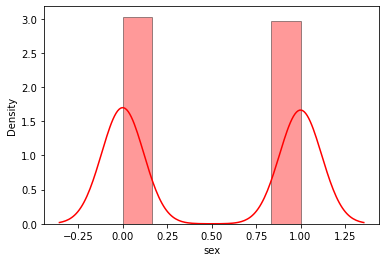

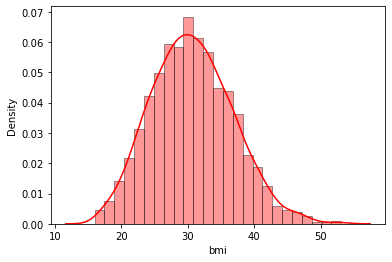

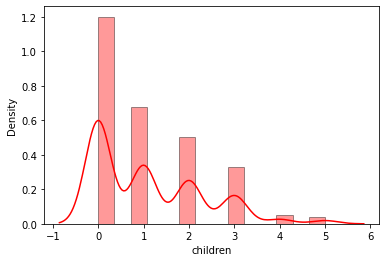

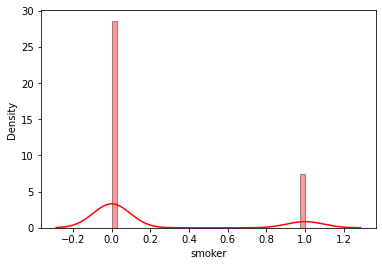

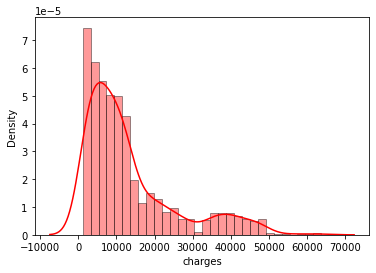

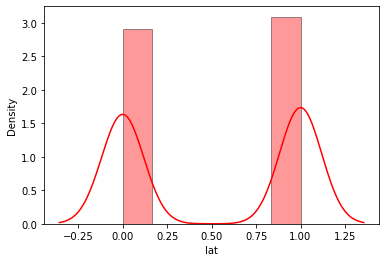

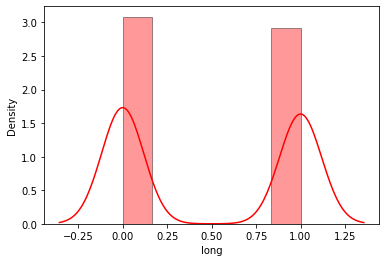

In [121]:
##########################################################
# Function to plot each distribution feature
##########################################################
import warnings
warnings.filterwarnings('ignore')
for column in df.columns:
    plt.figure()
    sns.distplot(df[column], color='red', hist_kws={"edgecolor": 'black'})

#### 03-Build Math Functions Multiple Variable

In [122]:
import math, copy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

##### 03.01-Raw data and aplly Functions

In [123]:
##########################################################
# Split Features and Target
##########################################################
X_train = np.array(df[["age","sex","bmi","children","smoker","lat","long"]].values)
y_train = np.array(df["charges"].values)

In [124]:
##########################################################
# Set first values for b & w parameters
##########################################################

b_init = 10
w_init = np.array([ 1, 0.1, 50, 1, 0.1, 0.1, 0.1])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (7,), b_init type: <class 'int'>


In [125]:
##########################################################
# Linear regression multiple features
##########################################################
def predict_single_loop(x, w, b): 
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b                
    return p

In [126]:
##########################################################
# Linear regression multiple features matrix times
##########################################################
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    

In [127]:
##########################################################
# One row test model
##########################################################
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (7,), x_vec value: [19.   1.  27.9  0.   1.   1.   1. ]
f_wb shape (), prediction: 1424.4


In [128]:
##########################################################
# Cost function
##########################################################
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [129]:
##########################################################
# Compute and display cost using start values parameters
##########################################################
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 140824854.83447534


In [130]:
##########################################################
# Gradient function
##########################################################
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [131]:
##########################################################
#Compute and display gradient 
##########################################################
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -11686.78044899777
dj_dw at initial w,b: 
 [-508374.93   -5442.4  -371125.27  -13781.14   -6238.71   -6156.49
   -5264.45]


In [132]:
##########################################################
# Gradient Descent function
##########################################################
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [ ]:
##########################################################
# Run model with parameters
##########################################################
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 500
alpha = 1.0e-6

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape


prediction_values = np.zeros(m)
target_values = np.zeros(m)
for i in range(m):
    prediction_values[i] = np.dot(X_train[i], w_final) + b_final
    target_values[i] = y_train[i]    

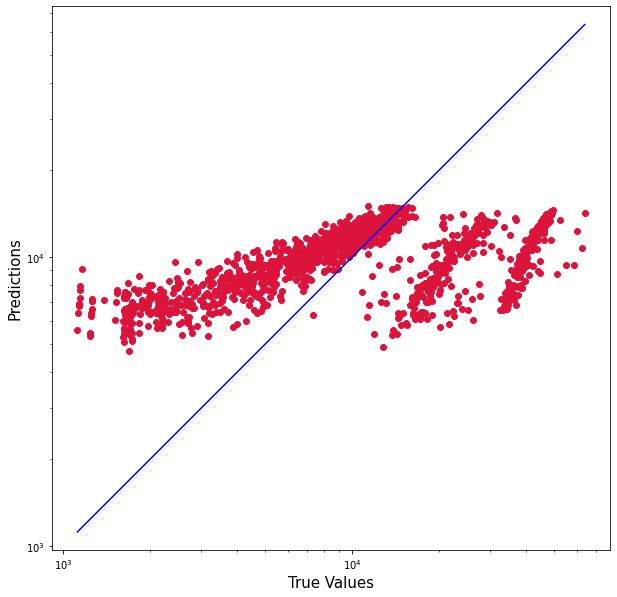

In [134]:
##########################################################
# Plot Results
##########################################################

plt.figure(figsize=(10,10))
plt.scatter(target_values, prediction_values, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_values), max(target_values))
p2 = min(min(prediction_values), min(target_values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

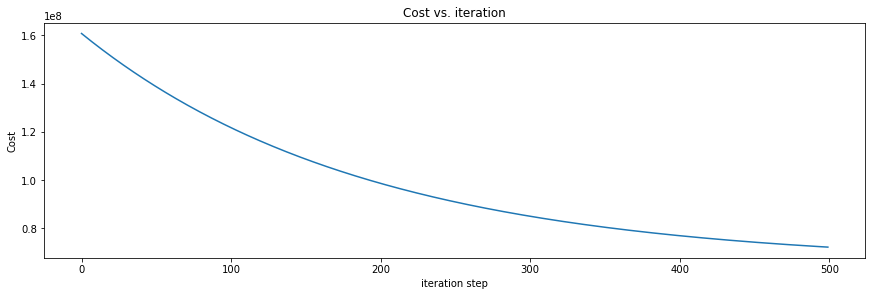

In [135]:
##########################################################
# plot cost versus iteration
##########################################################
# 
fig, (ax1) = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')              
ax1.set_xlabel('iteration step')  
plt.show()

##### 03.02-Normalize data and aplly Functions

In [136]:
##########################################################
# Function to normalize features
##########################################################
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

In [137]:
df_raw = load_data_csv(file_name="insurance.csv")
df_raw = change_columns(dataframe_input=df_raw)
df_raw.head(10)

,age,sex,bmi,children,smoker,charges,lat,long
0,19,1,27.900,0,1,16884.92400,1.0,1.0
1,18,0,33.770,1,0,1725.55230,1.0,0.0
2,28,0,33.000,3,0,4449.46200,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0
5,31,1,25.740,0,0,3756.62160,1.0,0.0
6,46,1,33.440,1,0,8240.58960,1.0,0.0
7,37,1,27.740,3,0,7281.50560,0.0,1.0
8,37,0,29.830,2,0,6406.41070,0.0,0.0
9,60,1,25.840,0,0,28923.13692,0.0,1.0


In [138]:
##########################################################
# Apply normalize
##########################################################
df_raw[["age","sex","bmi","children","smoker","lat","long"]], X_mu, X_sigma = zscore_normalize_features(df_raw[["age","sex","bmi","children","smoker","lat","long"]])
df_raw.head(10)

,age,sex,bmi,children,smoker,charges,lat,long
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,16884.92400,0.970538,1.028816
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,1725.55230,0.970538,-0.971991
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,4449.46200,0.970538,-0.971991
3,-0.441948,-0.989591,-1.305531,-0.908614,-0.507463,21984.47061,-1.030356,1.028816
4,-0.513149,-0.989591,-0.292556,-0.908614,-0.507463,3866.85520,-1.030356,1.028816
5,-0.584350,1.010519,-0.807656,-0.908614,-0.507463,3756.62160,0.970538,-0.971991
6,0.483668,1.010519,0.455486,-0.078767,-0.507463,8240.58960,0.970538,-0.971991
7,-0.157143,1.010519,-0.479567,1.580926,-0.507463,7281.50560,-1.030356,1.028816
8,-0.157143,-0.989591,-0.136714,0.751079,-0.507463,6406.41070,-1.030356,-0.971991
9,1.480485,1.010519,-0.791252,-0.908614,-0.507463,28923.13692,-1.030356,1.028816


In [139]:
##########################################################
# Split Features and Target
##########################################################
X_train = np.array(df_raw[["age","sex","bmi","children","smoker","lat","long"]].values)
y_train = np.array(df_raw["charges"].values)

In [140]:
##########################################################
# Set first values for b & w parameters
##########################################################

b_init = 10
w_init = np.array([ 1, 0.1, 50, 1, 0.1, 0.1, 0.1])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (7,), b_init type: <class 'int'>


In [141]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (7,), x_vec value: [-1.44  1.01 -0.45 -0.91  1.97  0.97  1.03]
f_wb shape (), prediction: -14.515332064548502


In [142]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 161066714.43384907


In [143]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -13260.422265141278
dj_dw at initial w,b: 
 [-3613.13   691.33 -2350.88  -821.47 -9529.8   -336.77   857.33]


In [ ]:
##########################################################
# Run model with parameters
##########################################################
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 500
alpha = 1.0e-6

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape

prediction_values = np.zeros(m)
target_values = np.zeros(m)
for i in range(m):
    prediction_values[i] = np.dot(X_train[i], w_final) + b_final
    target_values[i] = y_train[i]
    

In [145]:
from lab_utils_multi import  load_house_data, run_gradient_descent 

In [146]:
w_norm, b_norm, hist = run_gradient_descent(df_raw[["age","sex","bmi","children","smoker","lat","long"]].values, y_train,500,1.0e-6, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 1.61323e+08  3.6e-03 -6.9e-04  2.4e-03  8.2e-04  1.3e-02 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
       50 1.61309e+08  1.8e-01 -3.5e-02  1.2e-01  4.2e-02  6.8e-01 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
      100 1.61294e+08  3.7e-01 -7.0e-02  2.4e-01  8.3e-02  1.3e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
      150 1.61280e+08  5.5e-01 -1.0e-01  3.6e-01  1.2e-01  2.0e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
      200 1.61266e+08  7.3e-01 -1.4e-01  4.8e-01  1.7e-01  2.7e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
      250 1.61251e+08  9.1e-01 -1.7e-01  6.0e-01  2.1e-01  3.3e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -1.3e+04
      300 1.61237e+08  1.1e+00 -2.1e-01  7.2e-01  2.5e-01  4.0e+00 -3.6e+03  6.9e+02 -2.4e+03 -8.2e+02 -

In [147]:
m,_ = X_train.shape
prediction_values = np.zeros(m)
target_values = np.zeros(m)
for i in range(m):
    x_house = np.array(X_train[i])
    x_house_norm = (x_house - X_mu) / X_sigma
    prediction_values[i] = np.dot(x_house_norm, w_norm) + b_norm
    target_values[i] = y_train[i]    

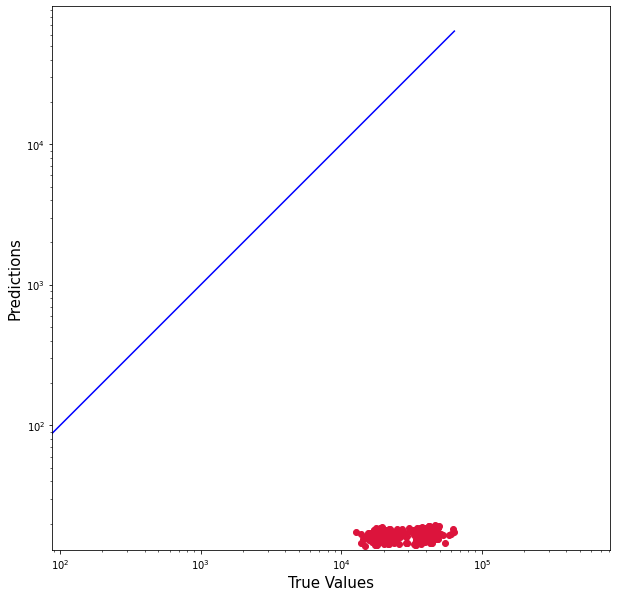

In [148]:
plt.figure(figsize=(10,10))
plt.scatter(target_values, prediction_values, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_values), max(target_values))
p2 = min(min(prediction_values), min(target_values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##### 03.03-K Fold Aplication

In [149]:
##########################################################
# Split dataframe in folds
##########################################################                                                             
fold1 = df.loc[0:223]                                            
fold2 = df.loc[224:446]
fold3 = df.loc[447:669]
fold4 = df.loc[670:893]
fold5 = df.loc[894:1117]
fold6 = df.loc[1118:1338]

In [150]:
##########################################################
# merge folds and separate test fold
##########################################################

df_1 = pd.concat([fold1, fold2, fold3, fold4, fold5])
test_val1 = fold6

df_2 = pd.concat([fold1, fold2, fold3, fold5, fold6])
test_val2 = fold5

df_3 = pd.concat([fold1, fold2, fold3, fold5, fold6])
test_val3 = fold4

df_4 = pd.concat([fold1, fold2, fold4, fold5, fold6])
test_val4 = fold3

df_5 = pd.concat([fold1, fold3, fold4, fold5, fold6])
test_val5 = fold2

df_6 = pd.concat([fold2, fold3, fold4, fold5, fold6])
test_val6 = fold1

In [151]:
##########################################################
# Function model to run each fold
##########################################################

def run_model(df_fold, test_fold):
    X_train = np.array(df_fold[["age","sex","bmi","children","smoker","lat","long"]].values)
    y_train = np.array(df_fold["charges"].values)
    X_test = np.array(test_fold[["age","sex","bmi","children","smoker","lat","long"]].values)
    y_test = np.array(test_fold["charges"].values)

    # initialize parameters
    initial_w = np.zeros_like(w_init)
    initial_b = 0.
    # some gradient descent settings
    iterations = 500
    alpha = 1.0e-6
    #alpha = 1.0e-2
    # run gradient descent 
    w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                        compute_cost, compute_gradient, 
                                                        alpha, iterations)
    print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
    m,_ = X_train.shape
    t,_ = X_test.shape

    prediction_values = np.zeros(t)
    target_values = np.zeros(t)
    
    for i in range(t):
        prediction_values[i] = np.dot(X_test[i], w_final) + b_final
        target_values[i] = y_test[i]
    
    plt.figure(figsize=(5,5))
    plt.scatter(target_values, prediction_values, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(prediction_values), max(target_values))
    p2 = min(min(prediction_values), min(target_values))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    return plt.show()

Iteration    0: Cost 159421132.35   
Iteration   50: Cost 137042877.29   
Iteration  100: Cost 119911923.82   
Iteration  150: Cost 106797832.17   
Iteration  200: Cost 96758688.39   
Iteration  250: Cost 89073447.93   
Iteration  300: Cost 83190144.01   
Iteration  350: Cost 78686240.50   
Iteration  400: Cost 75238281.82   
Iteration  450: Cost 72598659.45   
b,w found by gradient descent: 3.61,[159.54   1.61 116.5    4.33   2.62   1.92   1.48] 


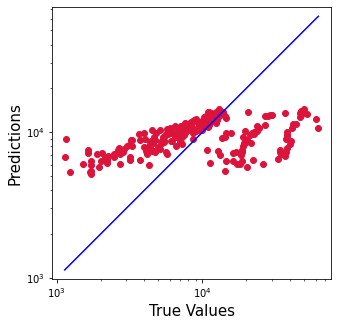

In [152]:
##########################################################
# Run Fold 1
##########################################################
run_model(df_fold=df_1, test_fold=test_val1)

Iteration    0: Cost 162909825.69   
Iteration   50: Cost 140445138.53   
Iteration  100: Cost 123174051.29   
Iteration  150: Cost 109895812.48   
Iteration  200: Cost 99687282.36   
Iteration  250: Cost 91838749.53   
Iteration  300: Cost 85804586.71   
Iteration  350: Cost 81165314.74   
Iteration  400: Cost 77598437.34   
Iteration  450: Cost 74856018.81   
b,w found by gradient descent: 3.70,[160.27   1.57 118.61   4.5    2.69   1.94   1.65] 


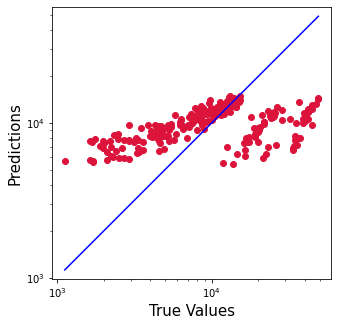

In [153]:
##########################################################
# Run Fold 2
##########################################################
run_model(df_fold=df_2, test_fold=test_val2)

Iteration    0: Cost 162909825.69   
Iteration   50: Cost 140445138.53   
Iteration  100: Cost 123174051.29   
Iteration  150: Cost 109895812.48   
Iteration  200: Cost 99687282.36   
Iteration  250: Cost 91838749.53   
Iteration  300: Cost 85804586.71   
Iteration  350: Cost 81165314.74   
Iteration  400: Cost 77598437.34   
Iteration  450: Cost 74856018.81   
b,w found by gradient descent: 3.70,[160.27   1.57 118.61   4.5    2.69   1.94   1.65] 


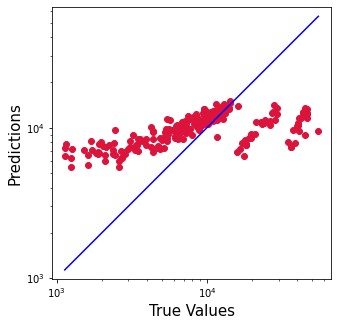

In [154]:
##########################################################
# Run Fold 3
##########################################################
run_model(df_fold=df_3, test_fold=test_val3)

Iteration    0: Cost 161582671.52   
Iteration   50: Cost 139539125.57   
Iteration  100: Cost 122545202.47   
Iteration  150: Cost 109444109.43   
Iteration  200: Cost 99344057.59   
Iteration  250: Cost 91557553.58   
Iteration  300: Cost 85554598.51   
Iteration  350: Cost 80926608.28   
Iteration  400: Cost 77358599.32   
Iteration  450: Cost 74607746.09   
b,w found by gradient descent: 3.69,[159.54   1.58 118.01   4.58   2.75   1.97   1.61] 


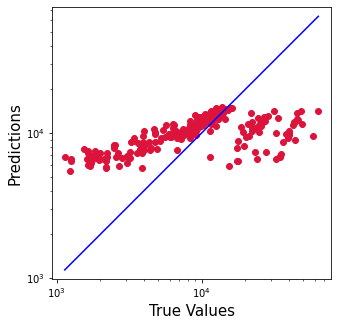

In [155]:
##########################################################
# Run Fold 4
##########################################################
run_model(df_fold=df_4, test_fold=test_val4)

Iteration    0: Cost 157370943.90   
Iteration   50: Cost 136279601.28   
Iteration  100: Cost 120020674.44   
Iteration  150: Cost 107486918.34   
Iteration  200: Cost 97824789.62   
Iteration  250: Cost 90376316.23   
Iteration  300: Cost 84634286.43   
Iteration  350: Cost 80207705.27   
Iteration  400: Cost 76795165.97   
Iteration  450: Cost 74164322.73   
b,w found by gradient descent: 3.62,[155.23   1.65 116.51   4.37   2.65   1.97   1.56] 


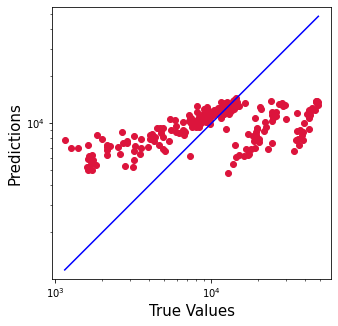

In [156]:
##########################################################
# Run Fold 5
##########################################################
run_model(df_fold=df_5, test_fold=test_val5)

Iteration    0: Cost 162021946.00   
Iteration   50: Cost 139535667.52   
Iteration  100: Cost 122285277.46   
Iteration  150: Cost 109051555.12   
Iteration  200: Cost 98899185.68   
Iteration  250: Cost 91110650.36   
Iteration  300: Cost 85135510.69   
Iteration  350: Cost 80551502.52   
Iteration  400: Cost 77034689.47   
Iteration  450: Cost 74336566.50   
b,w found by gradient descent: 3.66,[159.69   1.66 118.31   4.59   2.66   1.91   1.54] 


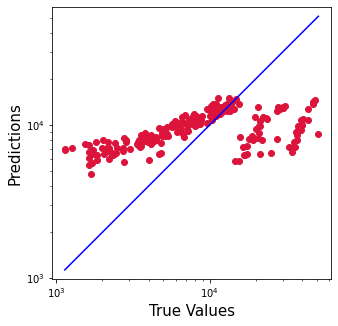

In [157]:
##########################################################
# Run Fold 6
##########################################################
run_model(df_fold=df_6, test_fold=test_val6)

In [160]:
##########################################################
# merge results
##########################################################
results = pd.DataFrame({'kfold': [1], 'gradient_descent': [3.69], 'cost': [74981588.22]})
results = results.append({'kfold': 2, 'gradient_descent': 3.61, 'cost': 72938035.45}, ignore_index=True)
results = results.append({'kfold': 3, 'gradient_descent': 3.61, 'cost': 72938035.45}, ignore_index=True)
results = results.append({'kfold': 4, 'gradient_descent': 3.62, 'cost': 71777591.39}, ignore_index=True)
results = results.append({'kfold': 5, 'gradient_descent': 3.71, 'cost': 77618369.77}, ignore_index=True)
results = results.append({'kfold': 6, 'gradient_descent': 3.72, 'cost': 75715028.39}, ignore_index=True)

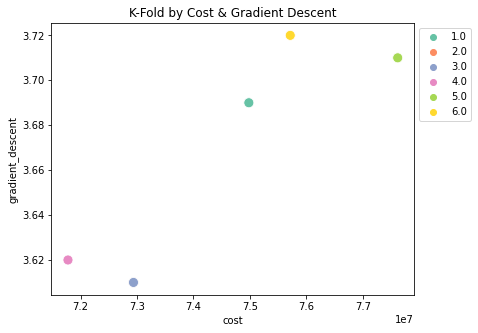

In [161]:
##########################################################
# Plot Folds results
##########################################################
plt.figure(figsize=(6.5,5))
sns.scatterplot(data = results, x = 'cost', y = 'gradient_descent', hue = 'kfold', s=100, palette="Set2").set(title='K-Fold by Cost & Gradient Descent')
plt.legend(markerscale=1, loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
plt.show()